**Финальная работа "Построение управленческого дашборда для ритейл компании"**

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Data SampleFW.xlsx')

**Знакомство с данными**

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,54214.000000,54214.000000,40643.000000
mean,9.610802,4.307341,15283.422803
std,57.358422,47.834496,1707.982278
min,-9600.000000,0.000000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16775.000000
max,2400.000000,6930.000000,18287.000000


In [5]:
df.shape

(54214, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null datetime64[ns]
UnitPrice      54214 non-null float64
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


Первичное знакомство с данными показало, что в данных есть пропуски, есть подозрительные данные (отрицательное количество проданных товаров). Также в данных встречаются задвоенные строки: 50 абсолютно одинаковых пар строк, это точно ошибки системы.

**Подготовка данных к анализу**

Пропуски в данных скорее всего не критичны, удалять не будем. Удалим повторы и строки с отрицательными значениями (это скорее всего возвраты или списание товаров), они не играют большой роли.

In [7]:
#уберем задвоенные строки
df[df.duplicated(keep=False)]
df.shape

(54214, 8)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(54164, 8)

In [9]:
#уберем строки с отрицательными значениями
df = df[df.Quantity > 0]

In [10]:
df.shape

(53082, 8)

In [11]:
#перезапишим в БД
df.drop_duplicates(inplace=True)
df.shape

(53082, 8)

**Статистическое знакомство с данными**

In [12]:
#посчитаем транзакции по странам
pd.DataFrame(df.Country.value_counts())

,Country
United Kingdom,48603
Germany,908
France,866
EIRE,758
Spain,251
Netherlands,232
Belgium,206
Switzerland,187
Portugal,151
Australia,123


In [13]:
#посчитаем сколько заказов из разных стран поступило
countries = df.groupby(by=['Country']).InvoiceNo.nunique().sort_values(ascending=False)
pd.DataFrame(countries)

,InvoiceNo
Country,
United Kingdom,12580
Germany,323
France,297
EIRE,229
Belgium,81
Spain,70
Netherlands,61
Portugal,46
Switzerland,39


Больше всего заказов было сделано в Великобритании, что не удивительно, ведь магазин британский.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53082 entries, 0 to 53253
Data columns (total 8 columns):
InvoiceNo      53082 non-null object
StockCode      53082 non-null object
Description    53032 non-null object
Quantity       53082 non-null int64
InvoiceDate    53082 non-null datetime64[ns]
UnitPrice      53082 non-null float64
CustomerID     39673 non-null float64
Country        53082 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.6+ MB


Мы имеем столбец с количеством проданных товаров 'Quantity' и столбец с ценой за единицу 'UnitPrice'. Отсюда мы можем получить сумму за товар. Запишем данные в новый столбец.

In [15]:
df['Summ'] = df['Quantity'] * df['UnitPrice']

In [16]:
#теперь добавим месяц покупки и день недели, тоже в новые столбцы, они пригодятся для дальнейшего анализа
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m') 
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Summ,Month,DayOfWeek
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12,Wednesday
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12,Wednesday
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12,Wednesday
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday


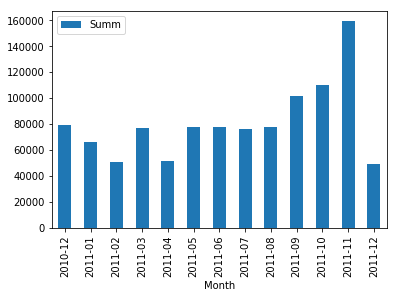

In [18]:
#построим график выручки по месяцам
df.groupby(['Month'])[['Summ']].sum().plot(kind='bar')

Из графика видно, что самыми прибыльными месяцами стали сентябрь, октябрь и ноябрь 2011 года. Резкий спад в декабре 2011 года объясняется недостатком данных, они обрываются на 9 декабря 2011.

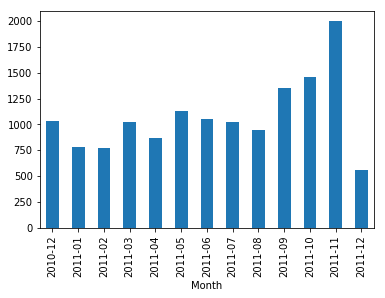

In [19]:
#посмотрим количество заказов по месяцам
SalesByMonth = df.groupby(by=['Month']).InvoiceNo.nunique().plot(kind='bar')

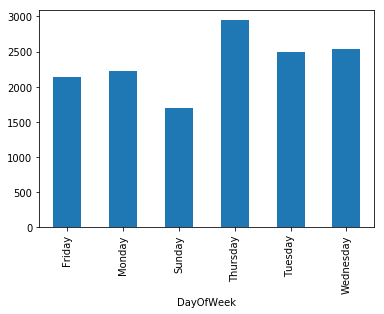

In [20]:
#посмотрим количество заказов по дням недели
SalesByDay = df.groupby(by=['DayOfWeek']).InvoiceNo.nunique().plot(kind='bar')


Самые популярные дни для заказов: четверг, среда и вторник. В субботу заказы не делаются совсем. Очень мало продаж в воскресенье.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

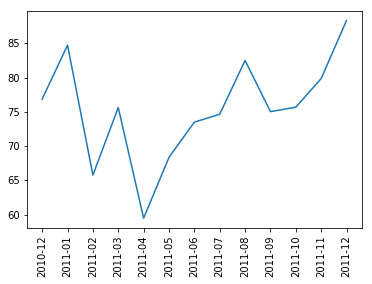

In [21]:
#посмотрим средний чек по месяцам
avgcheck = df.groupby(df['Month'])['Summ'].sum().divide(df.groupby(df['Month'])['InvoiceNo'].nunique())
plot = sns.lineplot(data=avgcheck)
plt.xticks(rotation='vertical')

Самый большой средний чек был в декабре 2011 года, а самый маленький - в апреле 2011. Необходимо дополнительно смотреть, с чем это было связано. К сожалению, мы не имеем данной информации.

In [22]:
#теперь посмотрим LTV (сколько денег потратил каждый клиент за все время)
ltv = df.groupby(df['CustomerID'])['Summ'].sum().sort_values(ascending=False)
ltv.head(10)

CustomerID
18102.0    26533.44
14646.0    25519.16
17450.0    23000.10
12415.0    16102.89
14911.0    15238.45
14156.0    12092.71
17949.0    12048.08
17511.0     9534.21
14096.0     8487.80
15769.0     8129.04
Name: Summ, dtype: float64

Мы получили топ-10 клиентов, которые потратили в данном интернет-магазине наибольшее количество денег за год.